In [95]:
import pandas as pd

# Load data
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


### Exploratory Dat Analysis

In [97]:
# Basic inspection
print("Shape of the dataset:", df.shape)
print("\nData types:\n", df.dtypes)

Shape of the dataset: (900, 8)

Data types:
 Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object


In [99]:
print(df.isnull().sum())
print(df.nunique())
print(df.info())

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64
Area               900
MajorAxisLength    900
MinorAxisLength    900
Eccentricity       900
ConvexArea         896
Extent             900
Perimeter          900
Class                2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4

* We can see that the data set has 900 rows and 8 columns.
* Most variables are numeric: int64 or float64, suitable for statistical analysis and machine learning.
* Class is an object (string), representing the categorical class of raisin (Kecimen, etc.).
* The values of features like Area, MajorAxisLength, and Perimeter vary significantly, suggesting some raisins are much bigger than others.
* Eccentricity ranges between ~0.56 and ~0.82 just from the few rows — indicating shape elongation varies.
* All sample rows shown are of the class 'Kecimen', but this doesn’t represent the whole dataset

In [101]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [103]:
df.describe(include = 'all')

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kecimen
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,NaN
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,NaN
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,NaN
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,NaN
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,NaN
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,NaN


**Area**
Raisins vary greatly in size; there might be outliers or a few very large raisins.

**MajorAxisLength (longest axis of the ellipse fitted to the shape)**
Shape length (major axis) differs significantly across samples; possible multiple raisin types with distinct size profiles.

**MinorAxisLength (shorter ellipse axis)**
Like MajorAxisLength, there’s substantial variance; this likely contributes to class separability.

**Eccentricity (measure of elongation)**
Some raisins are much more circular (0.35) and others highly elongated (0.96). This is probably a key class separator.

**ConvexArea (area of convex hull around the shape)**
 Closely tracks with Area but consistently slightly larger. Indicates surface complexity or uneven boundaries.

**Extent (Area / Bounding Box Area)**
Some raisins fill their bounding box poorly, others compactly. Again, might help with class separation.

**Perimeter**
Likely correlates with Area and Axis lengths; however, it can also reflect shape complexity (wrinkled vs smooth).

Over all, there might be some possible outliers especially for Area, ConvexArea, and Perimeter because they  are significantly larger than the 75th percentile.

### Exploratory Data Analysis

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_4606/3329838934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='pastel')


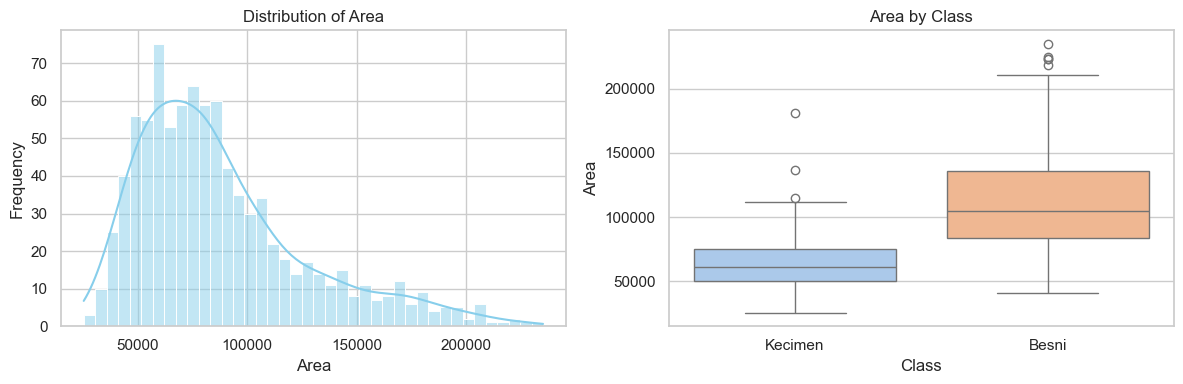

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_4606/3329838934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='pastel')


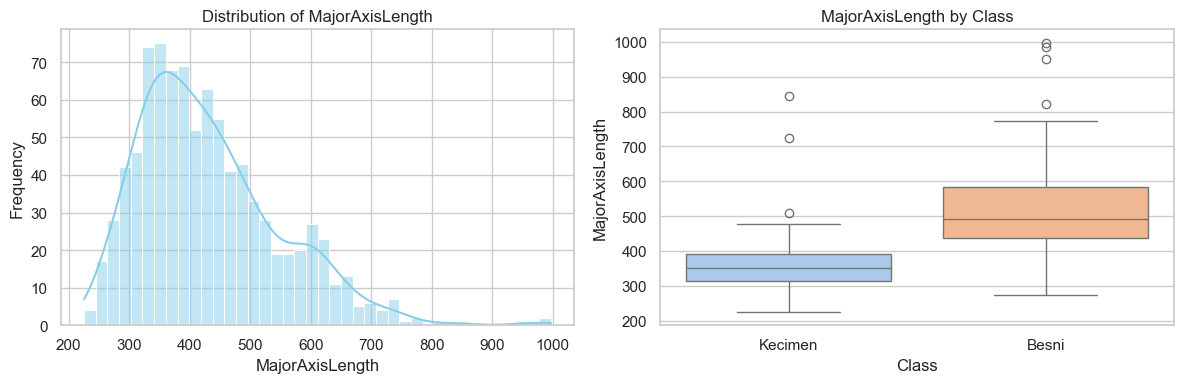

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_4606/3329838934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='pastel')


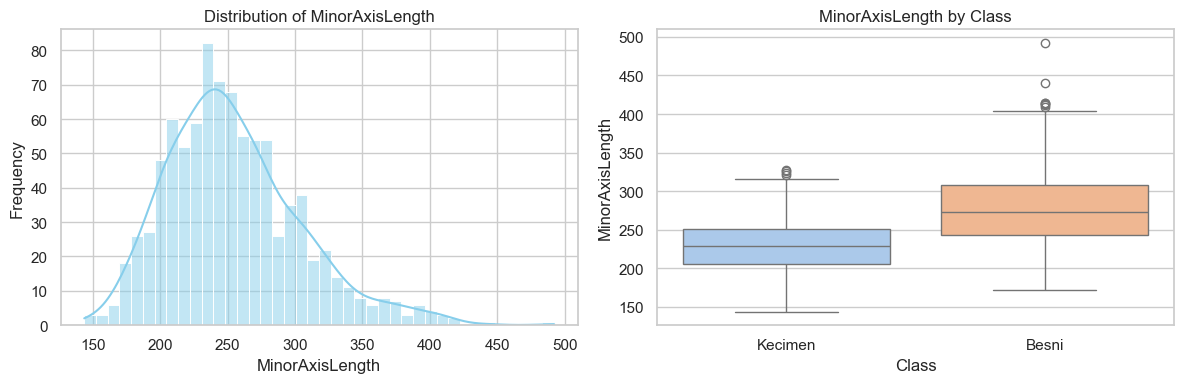

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_4606/3329838934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='pastel')


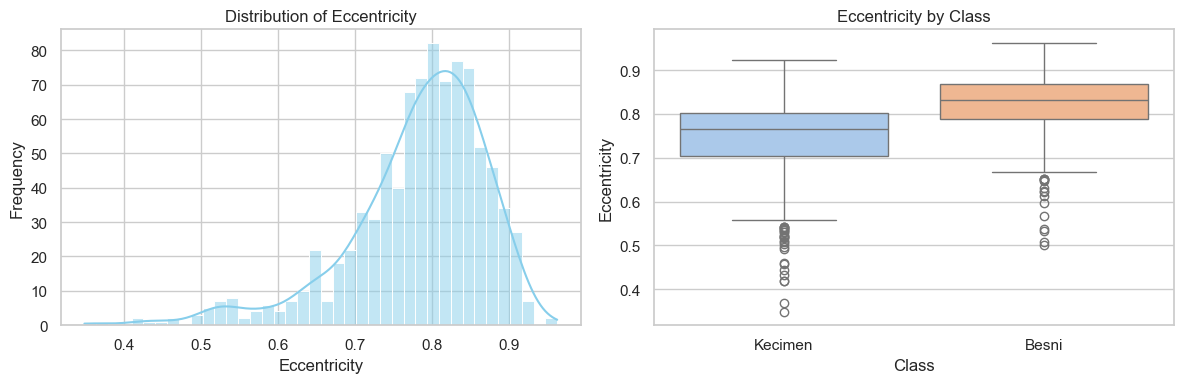

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_4606/3329838934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='pastel')


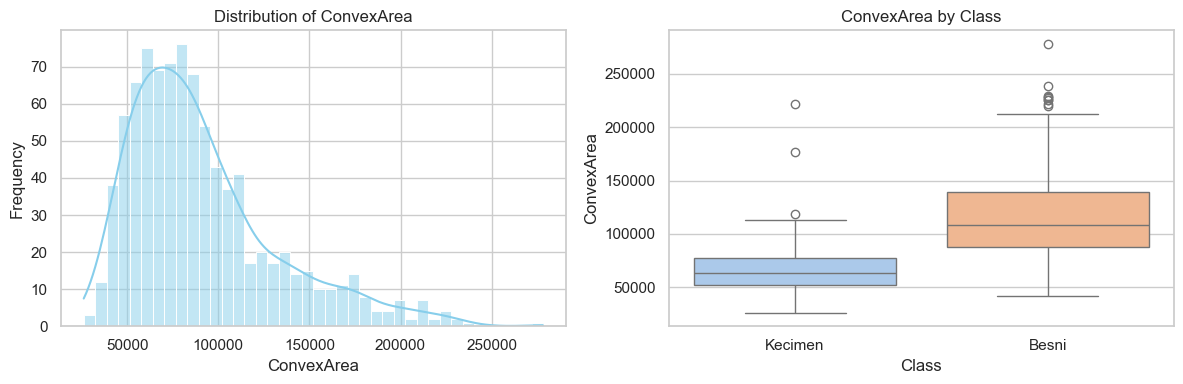

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_4606/3329838934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='pastel')


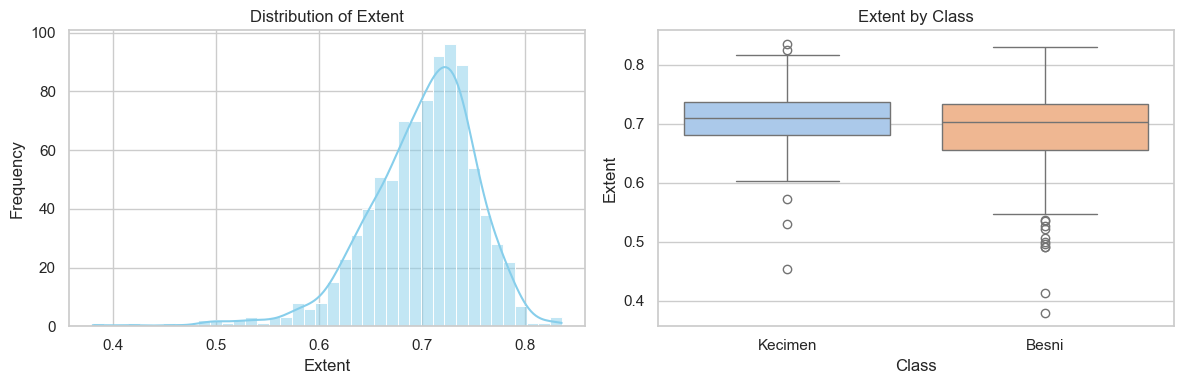

/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_4606/3329838934.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='pastel')


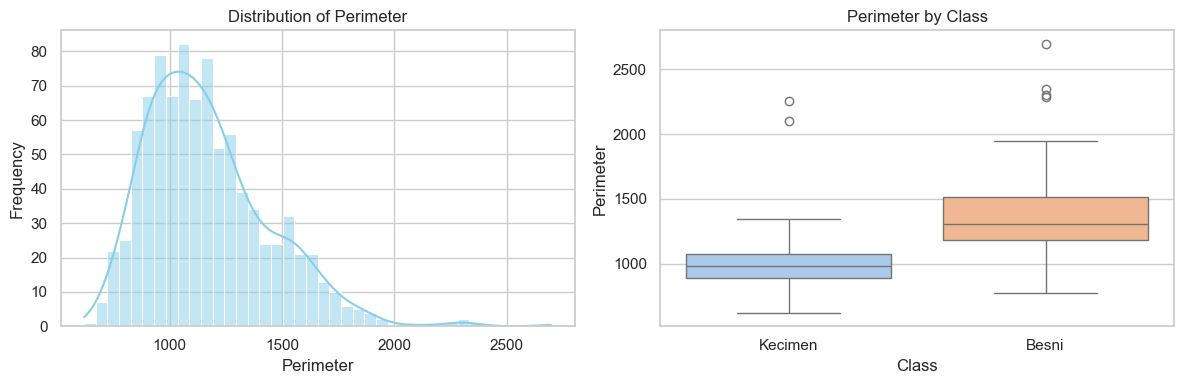

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style
sns.set(style="whitegrid")

# List of numeric columns (excluding Class)
numeric_cols = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
                'ConvexArea', 'Extent', 'Perimeter']

# Loop through and plot each feature
for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=40, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot by Class
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Class', y=col, data=df, palette='pastel')
    plt.title(f'{col} by Class')
    plt.xlabel('Class')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()


/var/folders/xd/k9ytlnfx6zdgdrgw2l_grb780000gp/T/ipykernel_4606/2234304153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


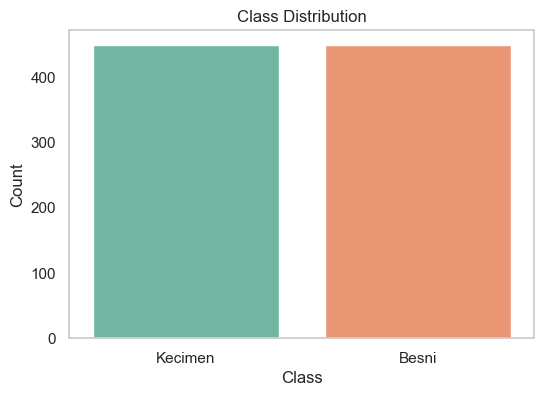

Class Counts:
 Class
Kecimen    450
Besni      450
Name: count, dtype: int64

Class Percentages:
 Class
Kecimen    50.0
Besni      50.0
Name: proportion, dtype: float64


In [107]:
# Class distribution (counts and percentage)
# This helps you understand if your classes are balanced or imbalanced
class_counts = df['Class'].value_counts()
class_percent = df['Class'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

# Display counts and percentages
print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percent.round(2))


This clearly indicate that the classes are perfectly balanced, which is ideal for training classifiers (no bias toward a majority class).

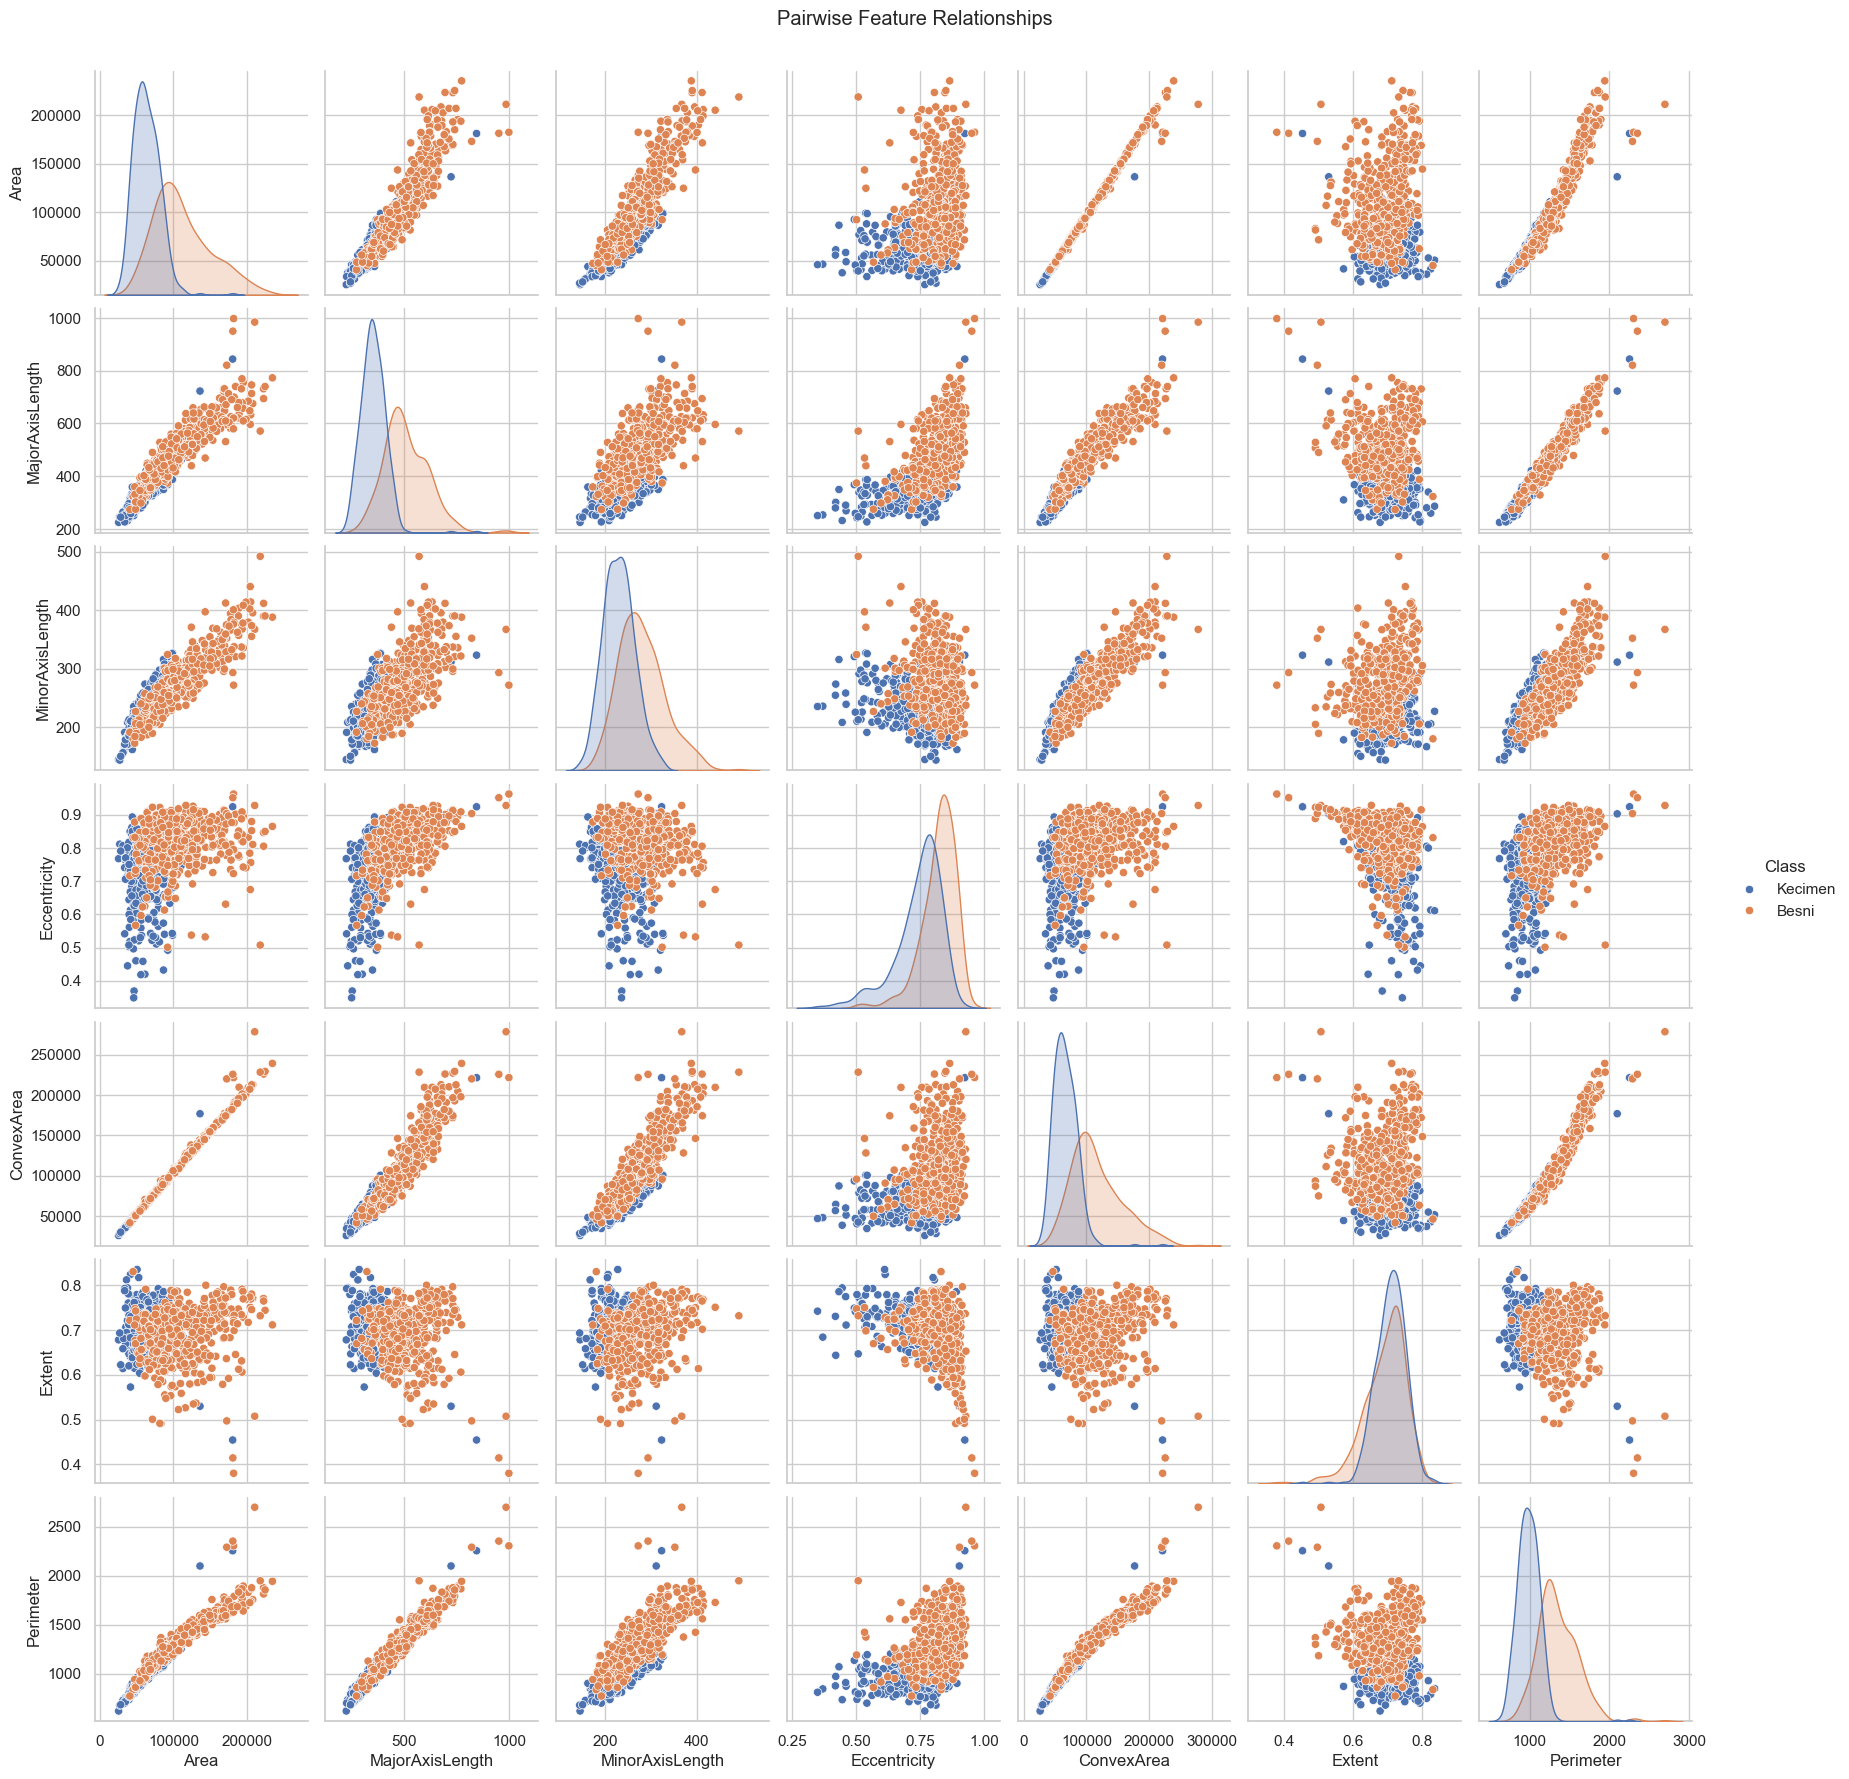

In [112]:
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


From the heatmap, we can see that Area and ConvexAreaa are Highly correlated, which is redundant information (1.00), Area and perimeter which is 0.96 shows that Larger area equals larger perimeter. Based on these results, we had to further preprocess our data by reducing correlated features before modeling this is because when predictors are highly correlated, the model struggles to determine which feature is influencing the target which can leads to unstable and inflated coefficients, making interpretation and generalization difficult. Finally it would help to reduce the risk of overfitting and so the model becomes better at handling new, unseen data

In [118]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


### Data Preprocessing

**Normalize the data set.**
We are normalizing the dataset because Skewed features can degrade performance for models that assume normality or linear relationships (like logistic regression or linear SVMs).

In [120]:
import numpy as np

# Apply log1p to skewed numerical features
df_log = df.copy()
skewed_features = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
df_log[skewed_features] = df_log[skewed_features].apply(np.log1p)

df_log.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,11.379680,6.094125,5.538480,0.598693,11.413624,0.564547,7.077532,Kecimen
1,11.227468,6.010509,5.497301,0.588789,11.274541,0.521249,7.023568,Kecimen
2,11.417042,6.094172,5.588478,0.586872,11.448046,0.493240,7.098024,Kecimen
3,10.734852,5.661364,5.345964,0.521759,10.765048,0.530393,6.739528,Kecimen
4,11.282367,5.867008,5.676163,0.447254,11.307916,0.583763,6.979379,Kecimen


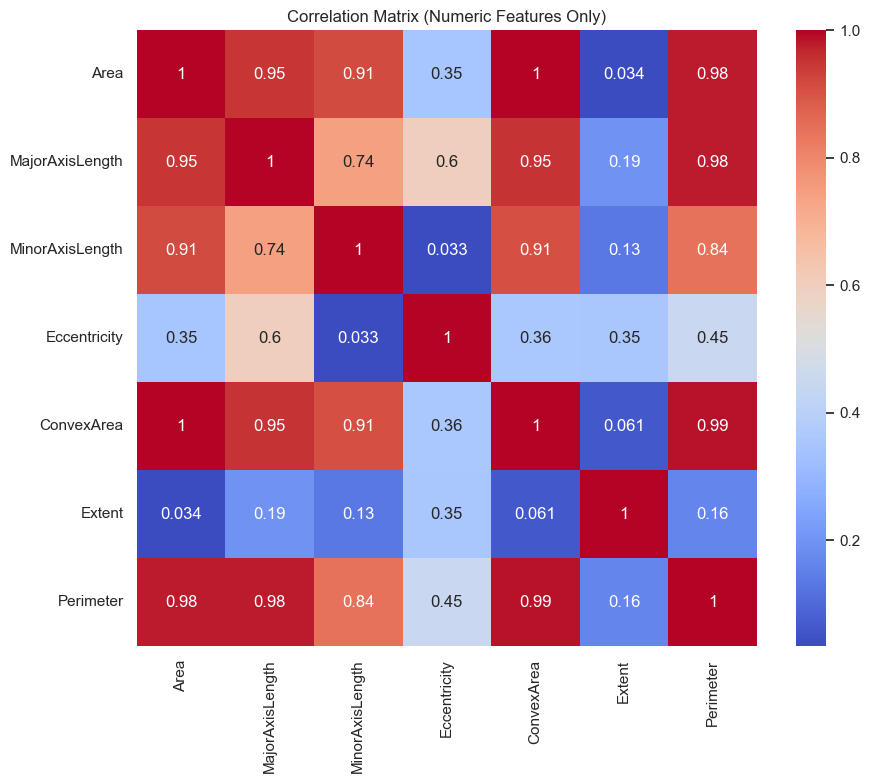

In [122]:
# Exclude non-numeric columns like 'Class'
numeric_df = df_log.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr().abs()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [124]:
import numpy as np

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation >= 0.9
to_drop = [column for column in upper.columns if any(upper[column] >= 0.99)]
print("Highly correlated features to consider dropping:", to_drop)

Highly correlated features to consider dropping: ['ConvexArea']


In [126]:
df_reduced = df.drop(columns=to_drop)
df_reduced.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,0.792772,1073.251,Kecimen


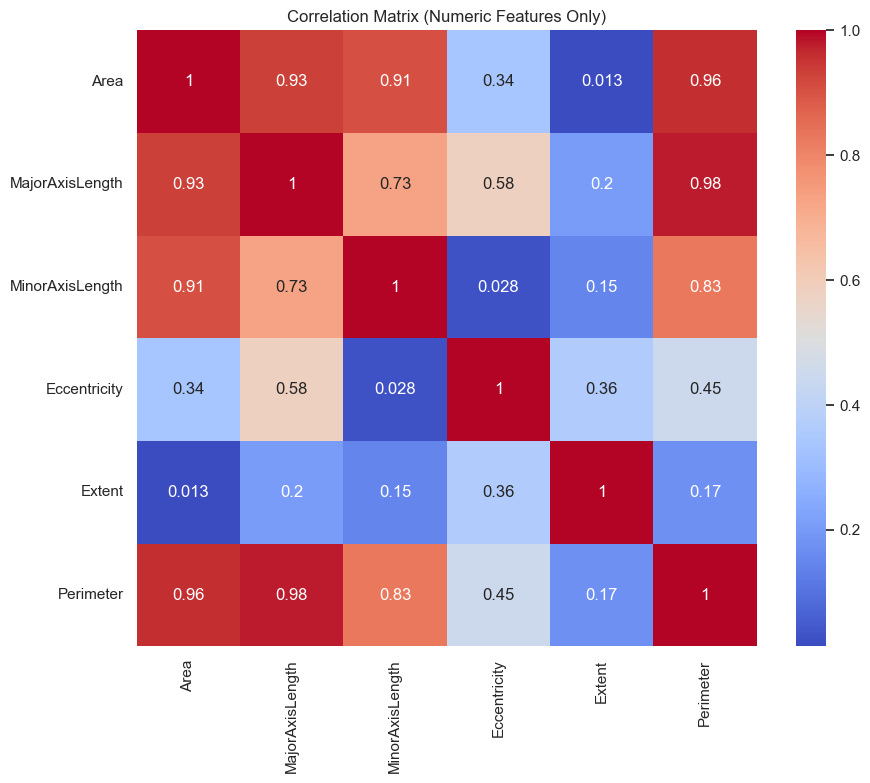

In [128]:
numeric_df_2 = df_reduced.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df_2.corr().abs()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

### Encoding the target column (Class)

In [130]:
from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original
df_model = df_reduced.copy()

le = LabelEncoder()
df_model['Class'] = le.fit_transform(df_model['Class'])  # Kecimen → 0, Besni → 1 (or vice versa)

### Split the data into feature and targets

In [132]:
X = df_model.drop('Class', axis=1)
y = df_model['Class']


### Train - test Split Data

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
X_train.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter
10,80437,449.454581,232.325506,0.856043,0.674236,1176.305
334,72483,334.417609,282.680889,0.534303,0.706180,1052.159
244,85739,380.370379,288.256159,0.652452,0.762152,1094.576
678,182788,621.206763,379.424446,0.791796,0.733061,1679.075
306,62835,421.169338,191.169862,0.891051,0.786145,1018.553


In [138]:
X_test.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter
70,95347,451.526154,280.226153,0.784111,0.674956,1255.245
827,61861,345.943650,235.430468,0.732706,0.702280,1063.621
231,52693,283.504239,242.113954,0.520265,0.737749,895.745
588,112808,542.504780,267.201878,0.870293,0.743155,1390.400
39,49882,287.264327,222.185873,0.633852,0.766378,843.764


### Normalize the Data (e.g., StandardScaler)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Fit Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

### Evaluate the Model

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.8555555555555555
Confusion Matrix:
 [[75 11]
 [15 79]]
Classification Report:
               precision    recall  f1-score   support

       Besni       0.83      0.87      0.85        86
     Kecimen       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



### Fit Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Evaluate the Model

In [59]:
y_pred_rf = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))

Accuracy: 0.8611111111111112
Confusion Matrix:
 [[73 13]
 [12 82]]
Classification Report:
               precision    recall  f1-score   support

       Besni       0.86      0.85      0.85        86
     Kecimen       0.86      0.87      0.87        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



### Decision Trees

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluate the model

In [65]:
y_pred_dt = dt_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))

Accuracy: 0.7944444444444444
Confusion Matrix:
 [[68 18]
 [19 75]]
Classification Report:
               precision    recall  f1-score   support

       Besni       0.78      0.79      0.79        86
     Kecimen       0.81      0.80      0.80        94

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180



### Fit Gradient Boosting Machines (GBM) Model

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

### Evaluate model

In [71]:
y_pred_gbm = gbm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))
print("Classification Report:\n", classification_report(y_test, y_pred_gbm, target_names=le.classes_))


Accuracy: 0.85
Confusion Matrix:
 [[72 14]
 [13 81]]
Classification Report:
               precision    recall  f1-score   support

       Besni       0.85      0.84      0.84        86
     Kecimen       0.85      0.86      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



### Fit Support Vector Machine (SVM)

In [74]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

### Evaluate Model

In [77]:
y_pred_svm = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))

Accuracy: 0.85
Confusion Matrix:
 [[70 16]
 [11 83]]
Classification Report:
               precision    recall  f1-score   support

       Besni       0.86      0.81      0.84        86
     Kecimen       0.84      0.88      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



### Cross-Validation
Instead of relying on a single train-test split, cross-validation gives a more reliable estimate of model performance by averaging over multiple folds.

In [79]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Initialize models
lr = LogisticRegression(random_state=42)
svm = SVC(kernel='rbf', random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
# Perform 5-fold cross-validation on scaled training data
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
svm_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
gb_scores = cross_val_score(gb, X_train_scaled, y_train, cv=5, scoring='accuracy')
dt_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Summarize results in a DataFrame
cv_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Mean Accuracy': [lr_scores.mean(), svm_scores.mean(), rf_scores.mean(), gb_scores.mean(), dt_scores.mean()],
    'Std Dev': [lr_scores.std(), svm_scores.std(), rf_scores.std(), gb_scores.std(), dt_scores.std()]
})

print(cv_results)



                 Model  Mean Accuracy   Std Dev
0  Logistic Regression       0.861111  0.030429
1                  SVM       0.875000  0.031056
2        Random Forest       0.856944  0.037935
3    Gradient Boosting       0.869444  0.021695
4        Decision Tree       0.834722  0.020318


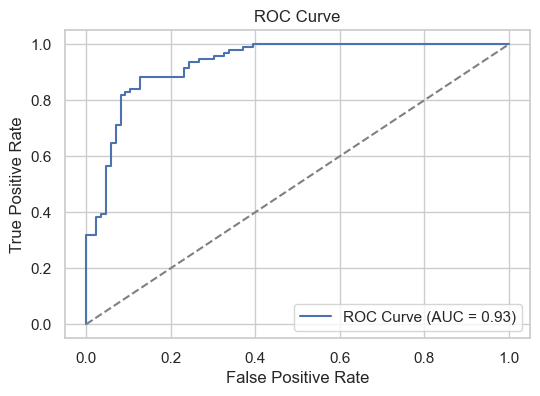

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for Class = 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

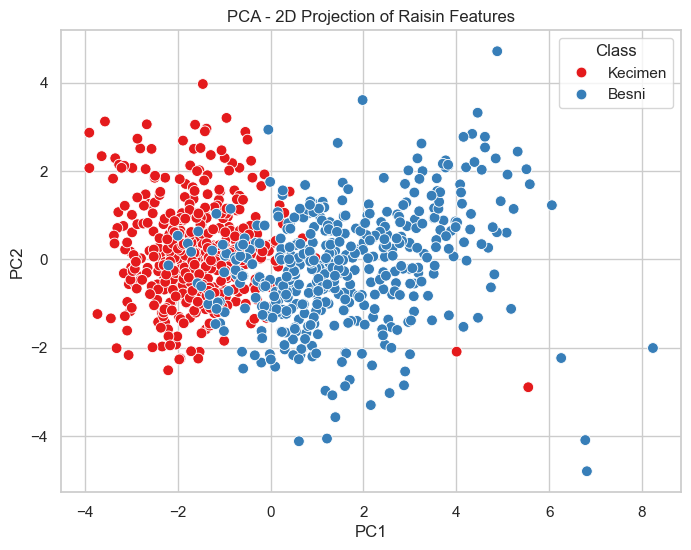

In [90]:
from sklearn.decomposition import PCA

# Standardize features
X = df_model
X_scaled = StandardScaler().fit_transform(X)

# PCA transformation
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Create DataFrame
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['Class'] = df['Class']

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='Set1', s=60)
plt.title('PCA - 2D Projection of Raisin Features')
plt.grid(True)
plt.show()
